<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Вычисления-финального-результата" data-toc-modified-id="Вычисления-финального-результата-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вычисления финального результата</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Восстановление золота из руды

Мы готовим прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Для этого мы используем данные с параметрами добычи и очистки. 

Модель должна помочь оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Предварительный план такой:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle

import matplotlib.pyplot as plt

import numpy as np

import statistics as st

from scipy import stats

#from progress.bar import Bar

from joblib import dump

Для начала давайте выгрузим данные и познакомимся с ними. 

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
display(data_train)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [3]:
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
display(data_test)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


В тестовой выборке не хватает 34 признаков. Ну приехали. Давайте, хотя бы узнаем, каких.

В задании это объясняется тем, что какие-то параметры "рассчитываются" и там нет целевых параметров. Однако это все есть в полной выборке. Зачем нам датасет с пропусками при наличии датасета без проопусков я ума не приложу. В общем, когда будет надо - просто разобьем полную выборку на тренировочную и тестовую и даже думать нечего. 

In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [5]:
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
display(data_full)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [6]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [7]:
#data_full.hist(figsize=(50, 50));

87 признаков... И все числовые. Их даже в таблице не увидишь все, с ними даже познакомиться непросто, очень интересно, как мы будем их обрабатывать. Пока ничего не понятно. 

Но давайте хотя бы посмотрим значения целевого признака. 

Числовые все кроме даты. Пардон, но дата нам уж точно не нужна. А если ради нее еще и данные обрабатывать... 

In [8]:
data_train1 = data_train.drop('date', axis=1)
#data_test = data_test.drop('date', axis=1)
#data_full = data_full.drop('date', axis=1)

In [9]:
print(data_full['rougher.output.recovery'].value_counts())

0.000000      394
83.406924      10
89.512544       6
100.000000      5
91.792293       5
             ... 
81.281279       1
87.035862       1
81.017150       1
77.494088       1
82.366128       1
Name: rougher.output.recovery, Length: 19017, dtype: int64


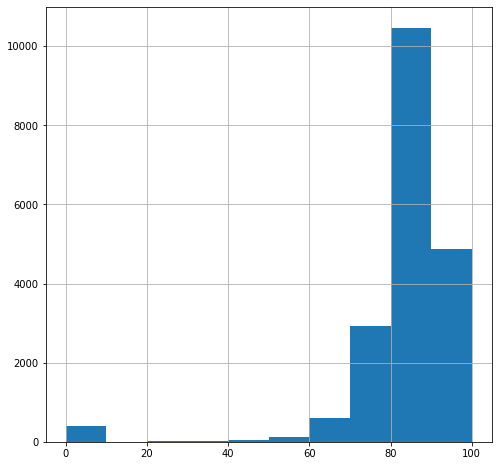

In [10]:
data_full['rougher.output.recovery'].hist(figsize=(8, 8));

У нас есть 394 нулевых значения целевого параметра 'rougher.output.recovery'. Бывет ли нулевая эффективность восстановления чернового концентрата? В теории, если модель будет плохая, можно удалить эти нули.

Нас спасаает то, что у нас есть четкое задание и путь по которому мы должны пройти, поэтому мы так и поступим. Категориальных признаков у нас нет, поэтому дополнительная обработка признаков не нужна. Конечно, можно сделать масштабировние, но я склоняюсь к модели случайного леса, мне кажется, она даст более качественный результат, а здесь масштабирование не нужно. 

Осуществим поиск гиперпараметров через GridSearchCV. Это будет очень долго, зато там вшита кросс-валидация и мы сможем получать наилучший результат с минимальным риском переобучения и оптимальными гиперпараметрами. Гиперпараметры сохраним, чтобы не запускать постоянно.

Изначально ни от каких данных избавляться мы не будем. Пускай модель сама определяет, что важно. Тем более что деревья с потрясающей легкостью игнорируют неважные параметры.

In [11]:
nan_count = data_train.isna().sum()
print(nan_count.head(43))

date                                                    0
final.output.concentrate_ag                             1
final.output.concentrate_pb                             1
final.output.concentrate_sol                          211
final.output.concentrate_au                             0
final.output.recovery                                   0
final.output.tail_ag                                    0
final.output.tail_pb                                  100
final.output.tail_sol                                   5
final.output.tail_au                                    0
primary_cleaner.input.sulfate                          20
primary_cleaner.input.depressant                       32
primary_cleaner.input.feed_size                         0
primary_cleaner.input.xanthate                        100
primary_cleaner.output.concentrate_ag                   0
primary_cleaner.output.concentrate_pb                  86
primary_cleaner.output.concentrate_sol                286
primary_cleane

In [12]:
print(nan_count.tail(43))

rougher.output.concentrate_ag                    0
rougher.output.concentrate_pb                    0
rougher.output.concentrate_sol                  22
rougher.output.concentrate_au                    0
rougher.output.recovery                          0
rougher.output.tail_ag                           1
rougher.output.tail_pb                           0
rougher.output.tail_sol                          0
rougher.output.tail_au                           0
rougher.state.floatbank10_a_air                  1
rougher.state.floatbank10_a_level                1
rougher.state.floatbank10_b_air                  1
rougher.state.floatbank10_b_level                1
rougher.state.floatbank10_c_air                  1
rougher.state.floatbank10_c_level                1
rougher.state.floatbank10_d_air                  0
rougher.state.floatbank10_d_level                0
rougher.state.floatbank10_e_air                436
rougher.state.floatbank10_e_level                0
rougher.state.floatbank10_f_air

Очень много Nan. Но хотя бы не в целевом показателе. Давайте, наверное, для начала заполним пропуски, потому что без них мы модель не построим. Наверное, заполним отрицательным значением, чтобы они реже путались с реальными цифрами. Ну и тогда придется допустить бОльшую глубину, потому что эти отрицательные значения могут в какой-то мере оказаться категориями. 

In [13]:
#data_train = data_train.fillna(value=-1)
data_train = data_train.fillna(method='ffill')
data_train1 = data_train1.fillna(method='ffill')

Для начала выделим целевой признак и остальные признаки. Затем построим модель, затем найдем гиперпараметры, потом оценим качество модели. 

In [14]:
#target_test = data_test['rougher.output.recovery']
#features_test = data_test.drop('rougher.output.recovery', axis=1)

In [15]:
target_train = data_train1['rougher.output.recovery']
features_train = data_train1.drop('rougher.output.recovery', axis=1)

In [16]:
features_train1, features_valid1, target_train1, target_valid1 = train_test_split(
    features_train, target_train, test_size=0.25, random_state=1984)

In [17]:
rfc = RandomForestRegressor()

На самом деле для Grid_Search_CV нам не очень-то и нужна валидационная выборка, что-то мы лишнего сделали. Ну и ладно, возвращаемся к первоначальному плану.

In [18]:
parameters = {'n_estimators': range (10, 51, 10),
             'max_depth': range (1,30, 1)}

In [19]:
#%%time
#grid = GridSearchCV(rfc, parameters, cv=4)
#grid.fit(features_train, target_train)
#grid.best_params_

2 час 20 минут. Вот это безумие... Наши оптимальные гиперпараметры: глубина 22, количество деревьев 40

In [20]:
rfr = RandomForestRegressor(max_depth=22, n_estimators=40, random_state=1984)

In [21]:
%%time
rfr.fit(features_train, target_train)

CPU times: user 30.6 s, sys: 60.1 ms, total: 30.7 s
Wall time: 30.8 s


RandomForestRegressor(max_depth=22, n_estimators=40, random_state=1984)

In [22]:
predictions_valid = rfr.predict(features_valid1)

In [23]:
print('МАЕ модели случайного леса', mean_absolute_error(target_valid1, predictions_valid))

МАЕ модели случайного леса 0.1990748226532472


In [24]:
model_reg = LinearRegression()
model_reg.fit(features_train, target_train) 

LinearRegression()

In [25]:
print('МАЕ модели регрессии', mean_absolute_error(target_valid1, model_reg.predict(features_valid1)))

МАЕ модели регрессии 3.1375210410174157


Модель случайного леса оказалась эффективней примерно в 15 раз. и вообще она получилась невероятно точной. Даже представить было невозможно, что у нас получится построить настолько точную модель. Теперь даже стало чуть меньше обидно, что 2 с половиной часа было потрачено на расчет гиперпараметров для модели. 

In [26]:
def rougher_efficeincy(au_after, au_before, au_tails):
    return (au_after*(au_before - au_tails))/(au_before*(au_after - au_tails))*100

In [27]:
rougher_calculated = rougher_efficeincy(data_train['rougher.output.concentrate_au'],
                                        data_train['rougher.input.feed_au'],
                                        data_train['rougher.output.tail_au'])

In [28]:
print(mean_absolute_error(data_train['rougher.output.recovery'], rougher_calculated))

9.73512347450521e-15


Можно сказать, что отличия почти и нет. 

Теперь давайте посмотрим параметры, которые недоступны в тестовой выборке и попробуем их охарактеризовать и найти общее.

In [29]:
columns_to_drop = data_test.columns
#data_missing = data_full.drop(columns_to_drop, axis=1)
#print(columns_to_drop)
#data_missing.info()

По сути все отсутствующие данные это выход продуктов и ховстов на разных этапах процесса очистки. Похоже на то, что это сделано для чистоты эксперимента и недопуска подглядывания. 

In [30]:
data_lacking = data_train[set(data_train.columns) - set(data_test.columns)]
data_lacking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   rougher.output.concentrate_au                       14149 non-null  float64
 1   final.output.concentrate_au                         14149 non-null  float64
 2   rougher.calculation.au_pb_ratio                     14149 non-null  float64
 3   final.output.concentrate_sol                        14149 non-null  float64
 4   rougher.output.recovery                             14149 non-null  float64
 5   rougher.output.concentrate_pb                       14149 non-null  float64
 6   rougher.output.concentrate_ag                       14149 non-null  float64
 7   primary_cleaner.output.concentrate_ag               14149 non-null  float64
 8   primary_cleaner.output.concentrate_sol              14149 non-null  float64


В свете новой оценки ситуации оценка данных остается прежней - данные отражают выход продуктов и хвостов на разных этапах очистки. Но меняется наше понимание, почему данные отсутствуют, они отсутствуют, потому что у нас нет этих данных для оценки эффективности обработки руды на этапе, когда производство еще не запущено. Поэтому и модель мы будем строить без этих данных.

Тогда давайте сделаем новый тренировочный датасет для нашей будущей модели.

In [31]:
columns = set(data_test.columns)
columns.update({'rougher.output.recovery', 'final.output.recovery'})
data_train_upd = data_train[columns]
data_train_upd =data_train_upd.drop('date', axis=1)
data_train_upd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   secondary_cleaner.state.floatbank4_b_level  14149 non-null  float64
 1   secondary_cleaner.state.floatbank3_a_air    14149 non-null  float64
 2   secondary_cleaner.state.floatbank2_b_air    14149 non-null  float64
 3   primary_cleaner.state.floatbank8_d_level    14149 non-null  float64
 4   rougher.state.floatbank10_c_air             14149 non-null  float64
 5   secondary_cleaner.state.floatbank2_a_air    14149 non-null  float64
 6   primary_cleaner.input.depressant            14149 non-null  float64
 7   secondary_cleaner.state.floatbank4_b_air    14149 non-null  float64
 8   rougher.output.recovery                     14149 non-null  float64
 9   rougher.input.feed_ag                       14149 non-null  float64
 10  primary_cl

Вот теперь у нас для обучения точно есть все и ничего лишнего.

## Анализ данных

Для начала давайте изучим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. 

In [32]:
data_outputs = data_train.drop(columns_to_drop, axis=1)

In [33]:
#print(columns_to_drop)

In [34]:
data_au = data_outputs[['final.output.concentrate_au',
                       'final.output.tail_au',
                       'primary_cleaner.output.concentrate_au',
                       'primary_cleaner.output.tail_au',
                       'rougher.output.concentrate_au',
                       'rougher.output.tail_au',
                       'secondary_cleaner.output.tail_au']]
display(data_au)

,final.output.concentrate_au,final.output.tail_au,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_au,rougher.output.concentrate_au,rougher.output.tail_au,secondary_cleaner.output.tail_au
0,42.192020,2.143149,34.174427,2.106679,19.793808,1.170244,2.606185
1,42.701629,2.224930,34.118526,2.353017,20.050975,1.184827,2.488248
2,42.657501,2.257889,33.969464,2.416800,19.737170,1.162562,2.458187
3,42.689819,2.146849,28.260743,2.262051,19.320810,1.079755,2.322062
4,42.774141,2.055292,33.044932,2.277073,19.216101,1.012642,2.330448
...,...,...,...,...,...,...,...
14144,46.713954,1.529220,32.940215,2.314352,18.603550,0.748633,0.000000
14145,46.866780,1.612542,32.925325,2.462890,18.441436,0.771582,0.000000
14146,46.795691,1.596616,31.856742,2.612231,15.111231,0.685059,0.000000
14147,46.408188,1.602879,30.770892,2.800648,17.834772,0.567130,0.000000


In [35]:
data_au_output = data_train[['rougher.input.feed_au',
                             'rougher.output.concentrate_au',
                             'primary_cleaner.output.concentrate_au',
                             'final.output.concentrate_au']]
data_au_output.columns = ['input', 'flot', '1st_cln', '2nd_cln']
display(data_au_output)

,input,flot,1st_cln,2nd_cln
0,6.486150,19.793808,34.174427,42.192020
1,6.478583,20.050975,34.118526,42.701629
2,6.362222,19.737170,33.969464,42.657501
3,6.118189,19.320810,28.260743,42.689819
4,5.663707,19.216101,33.044932,42.774141
...,...,...,...,...
14144,5.335862,18.603550,32.940215,46.713954
14145,4.838619,18.441436,32.925325,46.866780
14146,4.525061,15.111231,31.856742,46.795691
14147,4.362781,17.834772,30.770892,46.408188


In [36]:
au = data_au_output.mean()
display(au)

input       7.866577
flot       19.439958
1st_cln    32.386836
2nd_cln    44.003792
dtype: float64

Невоорожуненым взяглядом заметно, что с каждым этапо очистки концентрация золота значительно повышается. При чем прирост на кадом этапе примерно одинаковый.

In [37]:
#data_au_output.mean().plot()

In [38]:
data_ag_output = data_train[['rougher.input.feed_ag',
                             'rougher.output.concentrate_ag',
                             'primary_cleaner.output.concentrate_ag',
                             'final.output.concentrate_ag']]
data_ag_output.columns = ['input', 'flot', '1st_cln', '2nd_cln']
display(data_ag_output)

,input,flot,1st_cln,2nd_cln
0,6.100378,11.500771,8.547551,6.055403
1,6.161113,11.615865,8.558743,6.029369
2,6.116455,11.695753,8.603505,6.055926
3,6.043309,11.915047,7.221879,6.047977
4,6.060915,12.411054,9.089428,6.148599
...,...,...,...,...
14144,6.091855,11.124896,6.559174,3.224920
14145,6.121323,11.425983,6.612376,3.195978
14146,5.970515,8.523497,7.128896,3.109998
14147,6.048130,11.658799,7.490444,3.367241


In [39]:
ag = data_ag_output.mean()
display(ag)

input       8.579195
flot       11.775812
1st_cln     8.200916
2nd_cln     5.141921
dtype: float64

А вот с серебром все не так однозначно. После флотации концентрация серебра значительно увеличивается, но затем снижается с каждым последующем этапом очистки. 

In [40]:
data_pb_output = data_train[['rougher.input.feed_pb',
                             'rougher.output.concentrate_pb',
                             'primary_cleaner.output.concentrate_pb',
                             'final.output.concentrate_pb']]
data_pb_output.columns = ['input', 'flot', '1st_cln', '2nd_cln']
display(data_pb_output)

,input,flot,1st_cln,2nd_cln
0,2.284912,7.101074,10.389648,9.889648
1,2.266033,7.278807,10.497069,9.968944
2,2.159622,7.216833,10.354494,10.213995
3,2.037807,7.175616,8.496563,9.977019
4,1.786875,7.240205,9.986786,10.142511
...,...,...,...,...
14144,4.617558,10.984003,12.445966,11.356233
14145,4.144989,10.888213,12.623947,11.349355
14146,4.020002,8.955135,12.633558,11.434366
14147,3.902537,10.655377,12.012378,11.625587


In [41]:
pb = data_pb_output.mean()
display(pb)

input       3.505465
flot        7.664555
1st_cln     9.568544
2nd_cln    10.132848
dtype: float64

Концентрация свинца растет с каждым этапом, при этом прирост с каждым этапом ниже. 

Поскольку производство заточено на обогащение именно золота, не стоит удивляться, что именно коцентрация золота максимальна на последнем этапе. Да и в целом концентрация золота на всех этапах (кроме "до обогащения") выше, чем остальных металлов. 

Теперь давайите сравним распределение размеров гранул сырья в тестовой и треировочной выборках.  rougher.input.feed_size

<AxesSubplot:>

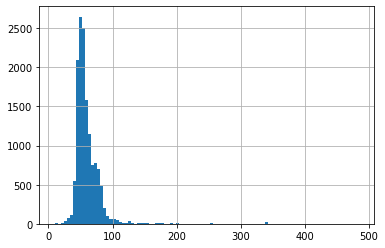

In [42]:
data_train['rougher.input.feed_size'].hist(bins=100)

In [43]:
print(data_train['rougher.input.feed_size'].mean(), data_train['rougher.input.feed_size'].median())

60.23985599255732 55.269783890501536


<AxesSubplot:>

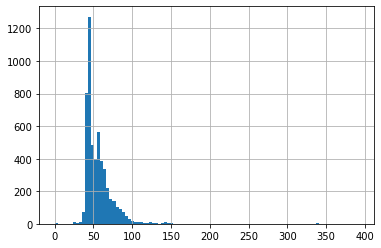

In [44]:
data_test['rougher.input.feed_size'].hist(bins=100)

In [45]:
print(data_test['rougher.input.feed_size'].mean(), data_test['rougher.input.feed_size'].median())

55.951097447596965 50.841029192879


Распределение размеров гранул сырья в выборках отличается, однако различие не кажется критичным.

Может, есть смысл тут посчитать какие-то статистики? 

Думаю, существует вероятность, что оценка модели будет неправильной, но эта вероятность на данный момент не выглядит пугающей. Думаю, нам следует продолжить расчеты и сначала получить оценку модели, а в случае нашей неудовлетворенности результатом сделать новые выборки на основе полного датасета.

In [46]:
metals = au + ag + pb
print(metals)

input      19.951237
flot       38.880325
1st_cln    50.156296
2nd_cln    59.278560
dtype: float64


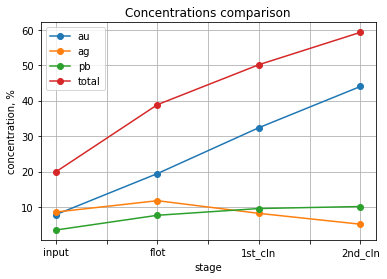

In [47]:
au.plot(label='au', marker='o')
ag.plot(label='ag', marker='o')
pb.plot(label='pb', marker='o')
metals.plot(label='total', marker='o')
plt.legend()
plt.xlabel('stage')
plt.ylabel('concentration, %')
plt.grid()
plt.title('Concentrations comparison')
plt.show()

На графике выше мы можем наблюдать, как меняется (перимущественно растет) концентрация металлов по мере очистки - как отдельно, так и в целом.

Суммарная концентрация металлов после обогащения вырастает практичеки в 3 раза, при этом основной рост приходится на увеличение концентрации золота. Оно и понятно - весь процесс заточен на то, чтобы увеличить концентрацию золота, а увеличение концентрации других металлов - всего лишь побочный продукт. Это мы можем видеть на примере изменеия концентрации серебра. Никого не волнует, что концентрация серебра падает после первичной и вторичной очистки, потому что это всего лишь побочный продукт, даже если серебро. 

## Модель

На этом этапе мы планируем построить модель для вычисления Итоговой sMAPE. Для этого нам надо найти эффективность обогащения чернового концентрата и эффективность обогащения финального концентрата. Модель для расчета чернового концентрата у нас уже есть. Осталось создать модель для расчета эффективности обогащения финального концентрата. Затем мы рассчитаем sMAPE для обеих этих метрик. 

Скорее всего наши два целевых параметра сильно коррелируют между собой. Давайте это выясним. 

In [48]:
print(data_full['final.output.recovery'].corr(data_full['rougher.output.recovery']))

0.32705873241331146


Корреляция, конечно, есть, но значимой ее на назовешь. 

Теперь у нас дилема, поскольку целевых параметров стало 2. Стоит ли оба параметра удалять из признаков, чтобы они не влияли на оценки друг друга и было как будто мы их не знаем? Скорее всего, да. К сожалению, нашу великоточную модель придется немного переделать...

И есть еще одна неприятная новость: в библиотеке sklearn отсутствует метрика sMAPE, а есть только MAPE, поэтому нам придется писать функцию с нуля.

In [49]:
def smape(y, y_p):
    return 1/len(y) * (np.sum(np.abs(y-y_p)/((np.abs(y)+np.abs(y_p))/2))) * 100

На данном этапе у нас появляется сложность: мы не сможем посчитать smape, если у нас нет true значений целевого параметра для конкретных объектов. А этих значений нет в тестовой выборке (даже колонки отсутствуют). Давайте посмотрим, есть ли эти значения в полной выборке и если да, то мы сделаем новую разбивку, обучим новый лес через gridsearch (но в этот раз уменьшим разброс, потому что мы уже примерно представляем себе оптимальные значения гиперпараметров.

Точнее, теперь моделей леса будет 2: одна будет считать эффективность обогащения чернового концентрата, а вторая - эффективность финального. 

И, кстати, благодаря вшитой кросс-валидации gridsearch, валидационную выборку мы делать не будем. 

Теперь все немного иначе, поскольку модель регрессии тоже будем строить наравне со случайным лесом.
То етсь итого будем делать 4 модели. 

Также еще разница в том, что мы не будем делать новые выборки, поскольку мы расчитываем получить данные для проверки из полного датсета.

In [50]:
print(data_full['final.output.recovery'].isna().sum())
print(data_full['rougher.output.recovery'].isna().sum())

0
0


Ну тогда понеслась.

In [51]:
#data_full = data_full.fillna(value=-1)

In [52]:
target_train_rougher = data_train_upd['rougher.output.recovery']
target_train_final = data_train_upd['final.output.recovery']
features_train = data_train_upd.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

In [53]:
features_train, features_valid, target_r_train, target_r_valid, target_f_train, target_f_valid = train_test_split(
    features_train, target_train_rougher, target_train_final, test_size=0.25, random_state=1985)

In [54]:
features_train1 = data_train_upd.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

In [55]:
#target_f_r = data_full['rougher.output.recovery']
#features_f_r = data_full.drop('rougher.output.recovery', axis=1)
#features_train, features_test, target_r_train, target_r_test  = train_test_split(
#    features_f_r, target_f_r, test_size=0.25, random_state=1985)

In [56]:
#target_f_train.shape

In [57]:
#target_r_test.shape

%%time
best_model = None
best_result = 100
est = 0
depth = 0
for est in range(10, 51, 10):
    for depth in range(1,25):
        model = RandomForestRegressor(random_state=1985, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_r_train)
        result = mean_absolute_error(target_r_valid, model.predict(features_valid))
        if result < best_result:
            best_model = model
            best_result = result
            est = est
            depth = depth
print(best_result, est, depth)

Всего-то 18 минут и мы получаем модель с глубиной 24 и количеством деревьев 50. Надеюсь, это стоило того и мы сэкономим куда больше времени на Гридсерче, потому что мы примерно представляем, где искать.

In [58]:
my_scorer = make_scorer(smape, greater_is_better=False)

In [59]:
rfr_rougher = RandomForestRegressor()

In [60]:
params = {'n_estimators': range (40, 51, 10),
             'max_depth': range (22,26, 1)}

In [61]:
%%time
grid = GridSearchCV(rfr_rougher, params, scoring=my_scorer, cv=3)
grid.fit(features_train, target_r_train)
grid.best_params_
#model_rougher = best_estimator_

CPU times: user 5min 25s, sys: 108 ms, total: 5min 25s
Wall time: 5min 26s


{'max_depth': 25, 'n_estimators': 40}

Оптимальные гиперпараметры: глубина 23, 50 деревьев

In [62]:
rfr_rougher = RandomForestRegressor(max_depth=23, n_estimators=50, random_state=1985)

In [63]:
rfr_rougher.fit(features_train, target_r_train)

RandomForestRegressor(max_depth=23, n_estimators=50, random_state=1985)

In [64]:
rougher_lr = LinearRegression()
rougher_lr.fit(features_train, target_r_train) 

LinearRegression()

In [65]:
scores = cross_val_score(rougher_lr, features_train, target_r_train, scoring=my_scorer, cv=5)
final_score = scores.mean()
print(scores)
print('Средняя оценка качества модели:', final_score)

[-10.20021965  -9.79913939  -9.78615668 -10.27745532 -11.41654485]
Средняя оценка качества модели: -10.29590317680436


In [66]:
#print('МАЕ модели леса для чернового концентрата',
#      mean_absolute_error(target_r_valid, model_rougher.predict(features_valid)))
print('МАЕ модели леса для чернового концентрата (обучение по гиперпараметрам, но без кросс-валидации)',
      mean_absolute_error(target_r_valid, rfr_rougher.predict(features_valid)))
print('МАЕ модели регресии для чернового концентрата',
      mean_absolute_error(target_r_valid, rougher_lr.predict(features_valid)))
print('МАЕ константной модели', mean_absolute_error(
    target_f_valid, pd.Series(target_r_train.mean(),index = target_r_valid.index)))

МАЕ модели леса для чернового концентрата (обучение по гиперпараметрам, но без кросс-валидации) 3.6737222904642617
МАЕ модели регресии для чернового концентрата 6.256837255738685
МАЕ константной модели 16.384727960683943


И все-таки лес получился в 2 раза лучше. Теперь построим модель для оценки эффективности обогащения финального концентрата.

Превосходство над константной моделью очевидно.

А тут уже нам приедстя отказаться от GridSearchCV. Еще 2 часа...

In [67]:
#rfr_final = RandomForestRegressor()

In [68]:
#%%time
#grid = GridSearchCV(rfr_final, params, scoring=my_scorer, cv=4)
#grid.fit(features_train, target_f_train)
#grid.best_params_
#model_final = best_estimator_

глубина 21 и 30 деревьев

In [69]:
%%time
rfr_final = None
best_result = 100000
est = 0
depth = 0
for est in range(10, 51, 10):
    for depth in range(1,26):
        model = RandomForestRegressor(random_state=1985, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_f_train)
        result = smape(target_f_valid, model.predict(features_valid))
        if result < best_result:
            rfr_final = model
            best_result = result
            est = est
            depth = depth
print(best_result, est, depth)

6.410034336807194 50 25
CPU times: user 18min 8s, sys: 597 ms, total: 18min 9s
Wall time: 18min 9s


почти 20 минут, гиперпараметы: глубина 25 и 50 деревьев.

In [70]:
#rfr_final2 = RandomForestRegressor(max_depth=23, n_estimators=50, random_state=1985)
#rfr_final2.fit(features_train, target_f_train)

In [71]:
scores_final = cross_val_score(rfr_final, features_train, target_f_train, scoring=my_scorer, cv=5)
final_score_f = scores_final.mean()
print(scores_final)
print('Средняя оценка качества модели:', final_score_f)

[-6.89817373 -6.63883615 -7.09143352 -7.20885438 -7.63997645]
Средняя оценка качества модели: -7.095454847605531


In [72]:
final_lr = LinearRegression()
final_lr.fit(features_train, target_f_train) 

LinearRegression()

In [73]:
scores_reg = cross_val_score(final_lr, features_train, target_f_train, scoring=my_scorer, cv=5)
final_score_r = scores.mean()
print(scores_reg)
print('Средняя оценка качества модели:', final_score_r)

[-9.21274827 -8.85850326 -9.24058793 -9.24690885 -9.49648327]
Средняя оценка качества модели: -10.29590317680436


In [74]:
print('МАЕ модели леса для финального концентрата (обучение по гиперпараметрам, но без кросс-валидации)',
      mean_absolute_error(target_f_valid, rfr_final.predict(features_valid)))
print('МАЕ модели регресии для финального концентрата',
      mean_absolute_error(target_f_valid, final_lr.predict(features_valid)))
print('МАЕ константной модели', mean_absolute_error(
    target_f_valid, pd.Series(target_f_train.mean(),index = target_f_valid.index)))

МАЕ модели леса для финального концентрата (обучение по гиперпараметрам, но без кросс-валидации) 3.8131649183090968
МАЕ модели регресии для финального концентрата 5.380566345721485
МАЕ константной модели 6.662632540360025


И снова модель случайного леса оказалась лучше. Хотя тут и константная модель нелдалеко. И новости это неприятные.

Теперь, когда у нас появились 2 отличные модели, давайте перейдем к расчету финального sMAPE. Функция у нас уже есть, осталось только подставить туда наши значения. 

In [75]:
smape_test = smape(target_f_valid, rfr_final.predict(features_valid))
print(smape_test)

6.410034336807194


То что функция работает мы убедились на переборе параметров для случайного леса. Но можно и еще раз.

## Вычисления финального результата

Для начала найдем проверочные значения для тестовой выборки. Единственно, что приходит в голову - надо совместить столбцы по дате. 

In [76]:
#data_check = data_full[['date', 'rougher.output.recovery', 'final.output.recovery']]
#data_test = data_test.set_index('date')
#data_check = data_check.set_index(['date'])
#data_checkable = data_test.merge(data_check, how = 'left') #когда без индекса я писал on='date'
#data_checkable = data_checkable.fillna(method='ffill')

In [77]:
#data_test = data_test.fillna(method='ffill') 
#data_test['rougher.output.recovery'] = data_check['rougher.output.recovery']
#data_test['final.output.recovery'] = data_check['final.output.recovery']
#print(data_test)

In [78]:
#target_test_rougher = data_test['rougher.output.recovery']
#target_test_final = data_test['final.output.recovery']
#features_test = data_test.drop(
#['rougher.output.recovery', 'final.output.recovery'], axis=1)

In [79]:
data_full = data_full.fillna(method='ffill')
data_check = data_full[data_full['date'].isin(data_test['date'])]
#display(data_check)

In [80]:
data_check = data_check[columns]
data_check = data_check.drop('date', axis=1)
#data_check.info()

In [81]:
target_test_rougher = data_check['rougher.output.recovery']
target_test_final = data_check['final.output.recovery']
features_test = data_check.drop(
['rougher.output.recovery', 'final.output.recovery'], axis=1)

In [82]:
final_smape = 0.25*smape(target_test_rougher, rfr_rougher.predict(
    features_test)) + 0.75*smape(target_test_final, rfr_final.predict(features_test))
print(final_smape)

10.648889093104346


In [83]:
final_smape2 = 0.25*smape(target_test_rougher, rougher_lr.predict(
    features_test)) + 0.75*smape(target_test_final, final_lr.predict(features_test))
print(final_smape2)

10.098167521230227


В итоге у нас регрессия еще и лучше показатель выдает. Все вообще зря...

В общем, качество скромное, отклонение 10,1%. На данном этапе у нас нет понимания, много это или мало. Точнее, понимание есть что все очень плохо, а вот понимание, может ли заказчик с определенным уровнем достоверности на основе этой модели оценить свои производственные, а затем и экономические показатели, чтобы потом определить целесообразность запуска производства - это уже вопрос к заказчику.

## Вывод

В ходе работы мы построили 4 модели, по одной для каждого целевого показателя - эффективности обогащения чернового концентрата и эффективности обогащения финального концентрата. Эти модели были оценены как единое целое при помощи метода симметричного среднего абсолютного процентного отклонения. Итоговый показатель получился хуже, чем ожидалось - smape больше 10%, уровень допустимой погрешности заказчику еще редстоит оценить.

В ходе задания мы столкнулись с пропусками в данных, это могло помешать нам получить оптимальный результат. Также негативный эффект могла иметь неравномерность выборки - был взят один непрерывный промежуток вместо выборки по всему датасету. Частично мы могли наблюдать это во второй главе, когда мы рассчитали, что средний размер гранул в тестовой выборке почти на 10% меньше.

В данный момент модель регрессии показала себя более устойчивой, к отличающимся данным, тем не менее, если обучить модель случайного леса на полном датасете или сделать равномерную выборку по всему датасету, модель случайного леса, вероятно, окажется лучше. 

Рекомендуем выбор модели будет основывать на том, насколько похожие условия будут для нового предприятия.